# GRADIENT DESCENT



In [2]:
# The following imports are assumed for the rest of the problems
import numpy as np
import matplotlib.pyplot as plt 
#from mpl_toolkits.mplot3d import axes3d
import numpy as np
import copy
from matplotlib.animation import FuncAnimation

In [9]:
def gradient_descent(gradient, start,end ,start_coeffecient=2 ,learn_rate=0.01, n_iter=2500, tolerance=1e-09,inter_values=True):
    # Initialize the value
    value = [(start[i] + end[i])/start_coeffecient for i in range(len(start))]
    # Check if the vector is within the bounds
    if  np.any(value>end) or np.any(value<start):
        print ("start_coeffecient value excideng range setting to 2")
        value = [(start[i] + end[i])/2 for i in range(len(start))]
    
    vector=value 
    if inter_values:
    # Initialize the list to store the intermediate vectors
        l=[]

        # Iterate over the number of iterations
        for _ in range(n_iter):

            # Compute the gradient
            diff = -learn_rate * gradient(*vector)

            # Check if the gradient is within the tolerance or if the vector is out of bounds
            if (np.all(np.abs(diff) <= tolerance) or np.any(vector>end) or np.any(vector<start)) :
                break

            # Update the vector
            vector += diff

            # Make a deep copy of the vector and append it to the list
            l.append (copy.deepcopy(vector) )        
        return vector,l
    else:
        l=[]

        # Iterate over the number of iterations
        for _ in range(n_iter):

            # Compute the gradient
            diff = -learn_rate * gradient(*vector)
            # Check if the gradient is within the tolerance or if the vector is out of bounds
            if (np.all(np.abs(diff) <= tolerance) or np.any(vector>end) or np.any(vector<start)) :
                break
            # Update the vector
            vector += diff
            # Make a deep copy of the vector and append it to the list
        return vector
    

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

[-1.49999995]


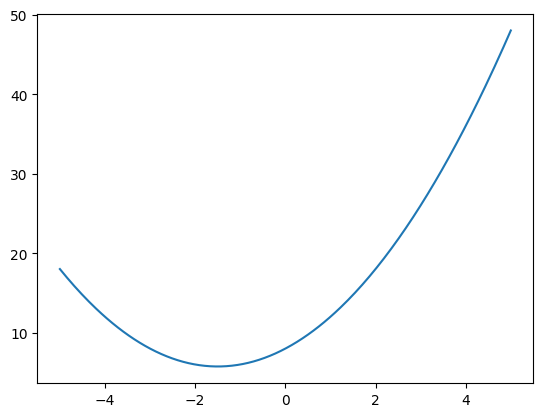

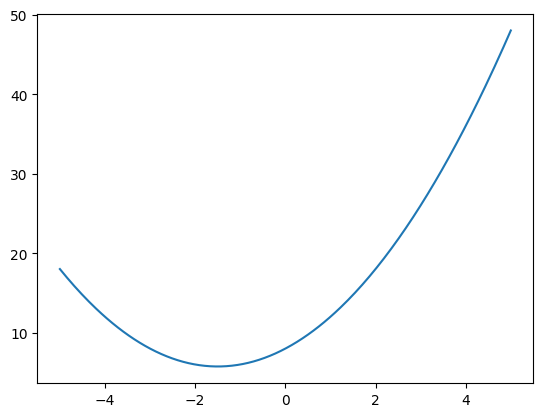

In [10]:
def f1(x):
    return x ** 2 + 3 * x + 8
def df1_dx(x):
    return 2*x + 3
xbase = np.linspace(-5, 5, 250)
plt.plot(xbase,f1(xbase))
start=np.array([-5],dtype=np.float64)
end=np.array([5],dtype=np.float64)
min,min_plt =gradient_descent(df1_dx,start,end)
print(min)
min_plt=np.array(min_plt)
#plt.plot(xbase,f1(xbase))

#plt.scatter(min_plt,f1(min_plt))
fig, ax = plt.subplots()
ax.plot(xbase,f1(xbase) )
line, = ax.plot([], [])
def init():
    line.set_data([], [])
    return line,

# Function to update the plot for each frame
def update(frame):
    line.set_data(min_plt[:frame], f1(min_plt)[:frame])  # Display the data up to the current frame
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(min_plt) + 1, init_func=init, blit=True, interval=50)

# Display the animation
plt.show()

# Save the animation as a GIF
ani.save('animationp1.gif', writer='pillow')

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

[3.92930898 2.        ]


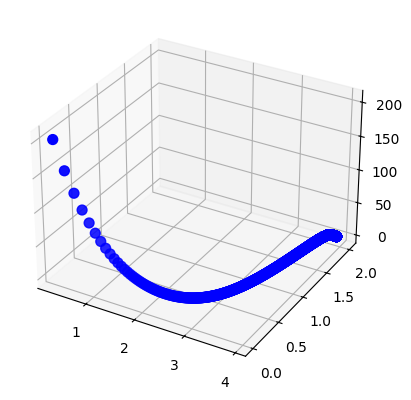

In [4]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4
def df3_dxy(x , y):
    return np.array([df3_dx(x, y),df3_dy(x, y)])
min,min_l=gradient_descent(df3_dxy,[-10,-10],[10,10],learn_rate=0.001, n_iter=25000, tolerance=1e-09)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Generate data
X = np.linspace(-10, 10, 250)
Y = np.outer(np.linspace(-10, 10, 250), np.ones(250))
Z = f3(X, Y)

# Plot the surface
'''surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='green')


# Create an empty scatter plot for the animation
scatter = ax.scatter([], [], [], color='blue', s=50)

# Function to update the scatter plot
def update(frame):
    if frame < len(min_l):
        x = min_l[frame][0]
        y = min_l[frame][1]
        z = f3(x, y)
        scatter.set_offsets([(x, y)])
        scatter.set_3d_properties(z, 'z')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(min_l), repeat=False,interval=5)
ani.save('animationp2.gif', writer='pillow')
# Display the animation
plt.show()
ax = plt.figure().add_subplot(projection='3d')
X=np.linspace(-10, 10, 250)
Y=np.outer(np.linspace(-10, 10, 250), np.ones(250))
Z=f3(X,Y)
ax.plot_surface(X, Y, Z, cmap='viridis',edgecolor='green')'''
x = [point[0] for point in min_l]
y = [point[1] for point in min_l]
z = [f3(point[0], point[1]) for point in min_l]
ax.scatter(x, y, z, color='blue', s=50)
print (min)


## Problem 3 - 2-D function 

Derivatives and limits given. 

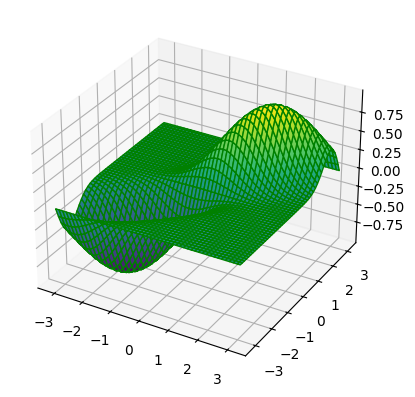

In [6]:
xlim4 = [-np.pi, np.pi]
def f4(x,y):
    return np.exp(-(x - y)**2) * np.sin(y)

def df4_dx(x, y):
    return -2 * np.exp(-(x - y)**2) * np.sin(y) * (x - y)

def df4_dy(x, y):
    return np.exp(-(x - y)**2) * np.cos(y) + 2 * np.exp(-(x - y)**2) * np.sin(y)*(x - y)
def df4_dxy(x , y):
    return np.array([df4_dx(x, y),df4_dy(x, y)])
min,min_l=gradient_descent(df4_dxy,[-3.14,-3.14],[3.14,3.14],6)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Generate data
X = np.linspace(-3.14, 3.14, 250)
Y = np.outer(np.linspace(-3.14, 3.14, 250), np.ones(250))
Z = f4(X, Y)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='green')


# Create an empty scatter plot for the animation
scatter = ax.scatter([], [], [], color='blue', s=50)

# Function to update the scatter plot
def update(frame):
    if frame < len(min_l):
        x = min_l[frame][0]
        y = min_l[frame][1]
        z = f4(x, y)
        scatter.set_offsets([(x, y)])
        scatter.set_3d_properties(z, 'z')

# Create the animation
#ani = FuncAnimation(fig, update, frames=len(min_l), repeat=False,interval=5)
#ani.save('animationp3.gif', writer='pillow')
# Display the animation
plt.show()

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

[1.66166081]


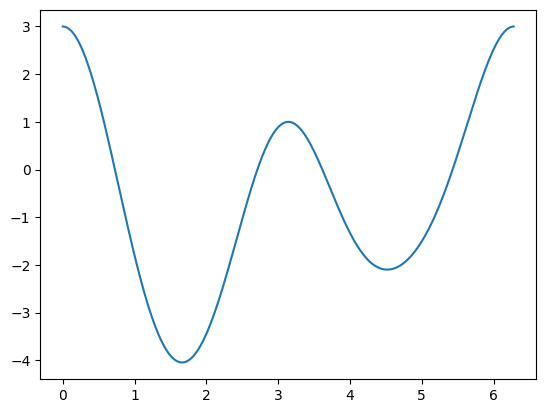

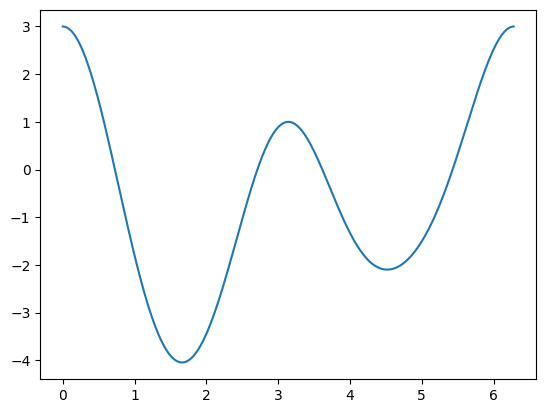

In [ ]:
def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1
def diff_f5(x):
    df_dx = 4 * np.cos(x)**3 * (-np.sin(x)) - 3 * (np.sin(x)**2) * np.cos(x) - 8 * np.sin(x) * np.cos(x) - np.sin(x)
    return df_dx
min,min_plt=gradient_descent(diff_f5,[0],[2*np.pi],4,n_iter=2500,learn_rate=0.1)
xbase = np.linspace(0, 6.28, 250)
min_plt_y=f5(min_plt)
print(min)
#plt.plot(xbase,f5(xbase))
fig, ax = plt.subplots()
ax.plot(xbase,f5(xbase) )
fig, ax = plt.subplots()
ax.plot(xbase,f5(xbase) )
line, = ax.plot([], [])
def init():
    line.set_data([], [])
    return line,

# Function to update the plot for each frame
def update(frame):
    line.set_data(min_plt[:frame], f5(min_plt)[:frame])  # Display the data up to the current frame
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(min_plt) + 1, init_func=init, blit=True, interval=50)

# Display the animation
plt.show()

# Save the animation as a GIF
ani.save('animationp4.gif', writer='pillow')